In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pytz
import numpy as np
from matplotlib.patches import Rectangle
from IPython.display import display

group1 = [15,17,19,20]

bookings = pd.read_json("../../chatbot_data/bookings/bookings18-9-23.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

# switch to a faster method of parsing datetime strings by inferring the format
bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True).dt.floor('S')
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True).dt.floor('S')
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True).dt.floor('S')

coordinationStartDate = datetime.datetime(2023,8,24,0,0,0,0,tzinfo=pytz.timezone('UTC'))
validBookings = bookings.loc[bookings['start']>= coordinationStartDate] 

g1Bookings = validBookings.loc[validBookings['user'].isin(group1)].copy()
g1Bookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
6,2023-08-24 19:00:00+00:00,1800,dishwasher,None,yes,0.380220,22,electricity_consumption,20,2023-08-24 18:19:29+00:00,2023-08-24 18:19:29+00:00
8,2023-08-26 16:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-25 20:26:23+00:00,2023-08-25 20:26:23+00:00
9,2023-08-26 17:00:00+00:00,3600,computer,None,yes,0.190037,14,electricity_consumption,15,2023-08-26 10:20:51+00:00,2023-08-26 10:20:51+00:00
10,2023-08-26 17:00:00+00:00,3600,computer,None,yes,0.190037,14,electricity_consumption,15,2023-08-26 10:22:25+00:00,2023-08-26 10:22:25+00:00
12,2023-08-27 17:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-26 22:12:42+00:00,2023-08-26 22:12:42+00:00
13,2023-08-28 12:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-26 22:15:33+00:00,2023-08-26 22:15:33+00:00
14,2023-08-27 06:00:00+00:00,1800,dishwasher,None,yes,0.380220,22,electricity_consumption,20,2023-08-26 23:12:21+00:00,2023-08-26 23:12:21+00:00
15,2023-08-27 15:00:00+00:00,7200,dishwasher,None,yes,2.293112,16,electricity_consumption,17,2023-08-27 14:30:19+00:00,2023-08-27 14:30:19+00:00
17,2023-08-28 14:00:00+00:00,14400,washing_and_drying,None,yes,3.334012,20,electricity_consumption,19,2023-08-28 11:11:18+00:00,2023-08-28 11:11:18+00:00
18,2023-08-29 17:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-28 19:42:43+00:00,2023-08-28 19:42:43+00:00


55 bookings were made by group one.
0 of those bookings were modified.


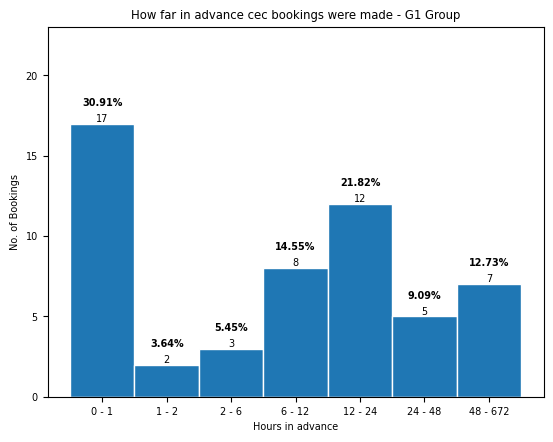

In [32]:
# G1 Group Analysis

# How far in advance was a booking made in hours?
g1Bookings['diff'] = (g1Bookings['start'] - g1Bookings['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(g1Bookings['diff'],bins)

# make modified bookings histogram
modified_bookings = g1Bookings['diff'].where(g1Bookings['modified_at'] > g1Bookings['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance cec bookings were made - G1 Group")

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(g1Bookings)
print(total_bookings, 'bookings were made by group one.')
print(modified_bookings.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all pilot group bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
    
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    if percentage != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in pilot group
for i, bar in enumerate(nested_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 6  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('group_one_cec_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# User 15 - Nika

bookingsUser15 = g1Bookings.loc[g1Bookings['user'] == 15].copy()

bookingsUser15

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
9,2023-08-26 17:00:00+00:00,3600,computer,None,yes,0.190037,14,electricity_consumption,15,2023-08-26 10:20:51+00:00,2023-08-26 10:20:51+00:00,6.652500
10,2023-08-26 17:00:00+00:00,3600,computer,None,yes,0.190037,14,electricity_consumption,15,2023-08-26 10:22:25+00:00,2023-08-26 10:22:25+00:00,6.626389
48,2023-09-09 09:10:00+00:00,7200,dishwasher,,yes,0.250000,14,electricity_consumption,15,2023-09-08 20:11:25+00:00,2023-09-08 20:11:25+00:00,12.976389
50,2023-09-09 15:00:00+00:00,3600,computer,,somewhat,0.190000,14,electricity_consumption,15,2023-09-09 14:31:17+00:00,2023-09-09 14:31:17+00:00,0.478611
52,2023-09-09 21:00:00+00:00,1800,kettle,,yes,0.140000,14,electricity_consumption,15,2023-09-09 14:31:43+00:00,2023-09-09 14:31:43+00:00,6.471389
53,2023-09-09 15:00:00+00:00,7200,watching_tv,,yes,0.580000,14,electricity_consumption,15,2023-09-09 14:31:51+00:00,2023-09-09 14:31:51+00:00,0.469167
83,2023-09-13 08:21:00+00:00,21600,computer,I am going to use my computer 6 hours tomorrow,yes,0.190000,14,electricity_consumption,15,2023-09-12 23:21:26+00:00,2023-09-12 23:21:26+00:00,8.992778


7 bookings were made by User 15 - Nika.
0 of those bookings were modified.


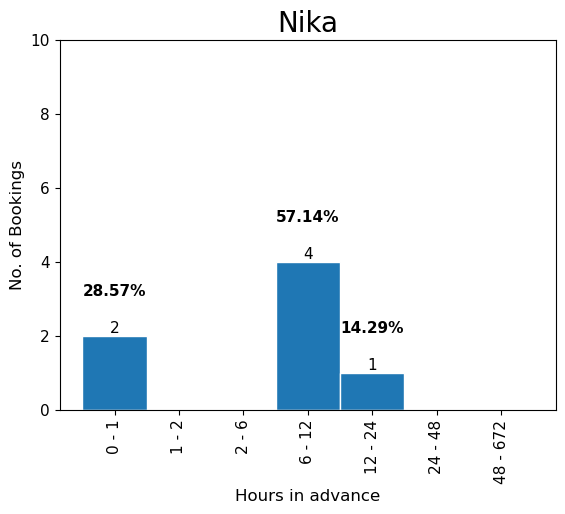

In [30]:
# Booking pattern for User 15

# How far in advance was a booking made in hours?
bookingsUser15['diff'] = (bookingsUser15['start'] - bookingsUser15['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 11})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser15['diff'],bins)

# make modified bookings histogram
modified_bookings_user_15 = bookingsUser15['diff'].where(bookingsUser15['modified_at'] > bookingsUser15['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_15, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)], rotation = 90)

ax.set_xlabel("Hours in advance", fontsize = 12)
ax.set_ylabel("No. of Bookings", fontsize = 12)

# Add the title to the histogram
ax.set_title("Nika", fontsize = 20)

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser15)
print(total_bookings, 'bookings were made by User 15 - Nika.')
print(modified_bookings_user_15.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 15 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
    if percentage != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in user 15
for i, bar in enumerate(nested_bars):
    height = bar.get_height() # this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('nika_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# User 17 - Tricia

bookingsUser17 = g1Bookings.loc[g1Bookings['user'] == 17].copy()

bookingsUser17

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
15,2023-08-27 15:00:00+00:00,7200,dishwasher,None,yes,2.293112,16,electricity_consumption,17,2023-08-27 14:30:19+00:00,2023-08-27 14:30:19+00:00,0.494722
23,2023-08-30 10:00:00+00:00,7200,dishwasher,None,yes,2.293112,16,electricity_consumption,17,2023-08-29 18:28:56+00:00,2023-08-29 18:28:56+00:00,15.517778
55,2023-09-10 09:15:00+00:00,10800,other,,no,0.230000,16,electricity_consumption,17,2023-09-10 09:11:08+00:00,2023-09-10 09:11:08+00:00,0.064444
56,2023-09-10 10:00:00+00:00,3600,air_cooling,,no,0.210000,16,electricity_consumption,17,2023-09-10 09:18:42+00:00,2023-09-10 09:18:42+00:00,0.688333
57,2023-09-10 09:30:00+00:00,3600,dishwasher,Ok to move,yes,0.670000,16,electricity_consumption,17,2023-09-10 09:25:22+00:00,2023-09-10 09:25:22+00:00,0.077222
58,2023-09-10 17:00:00+00:00,10800,other,Laundry,no,0.230000,16,electricity_consumption,17,2023-09-10 15:48:07+00:00,2023-09-10 15:48:07+00:00,1.198056
59,2023-09-10 16:00:00+00:00,10800,other,More laundry,yes,0.230000,16,electricity_consumption,17,2023-09-10 15:50:15+00:00,2023-09-10 15:50:15+00:00,0.162500
80,2023-09-12 20:00:00+00:00,3600,dishwasher,,no,0.670000,16,electricity_consumption,17,2023-09-12 19:12:20+00:00,2023-09-12 19:12:20+00:00,0.794444
81,2023-09-13 08:00:00+00:00,3600,dishwasher,Fast intense wash,no,0.670000,16,electricity_consumption,17,2023-09-12 19:13:46+00:00,2023-09-12 19:13:46+00:00,12.770556
82,2023-09-13 07:00:00+00:00,3600,meal_breakfast,,no,0.210000,16,electricity_consumption,17,2023-09-12 19:15:31+00:00,2023-09-12 19:15:31+00:00,11.741389


10 bookings were made by User 17 - Tricia.
0 of those bookings were modified.


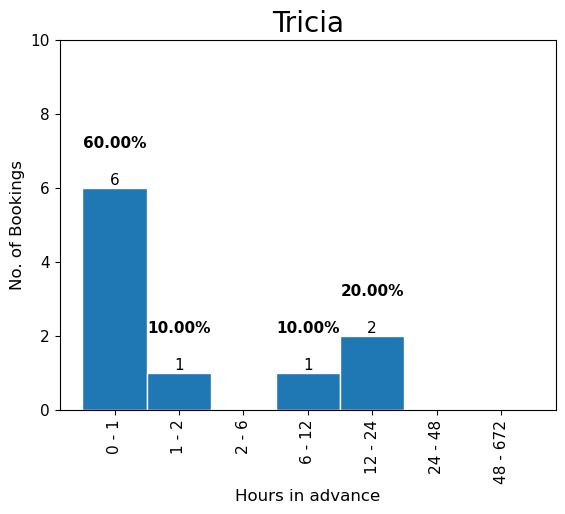

In [29]:
# Booking pattern for User 17

# How far in advance was a booking made in hours?
bookingsUser17['diff'] = (bookingsUser17['start'] - bookingsUser17['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 11})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser17['diff'],bins)

# make modified bookings histogram
modified_bookings_user_17 = bookingsUser17['diff'].where(bookingsUser17['modified_at'] > bookingsUser17['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_17, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)], rotation = 90)

ax.set_xlabel("Hours in advance", fontsize = 12)
ax.set_ylabel("No. of Bookings", fontsize = 12)

# Add the title to the histogram
ax.set_title("Tricia", fontsize = 20)

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser17)
print(total_bookings, 'bookings were made by User 17 - Tricia.')
print(modified_bookings_user_17.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 17 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
    if percentage != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in user 17
for i, bar in enumerate(nested_bars):
    height = bar.get_height() # this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('tricia_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# User 19 - Andrew

bookingsUser19 = g1Bookings.loc[g1Bookings['user'] == 19].copy()

bookingsUser19

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
8,2023-08-26 16:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-25 20:26:23+00:00,2023-08-25 20:26:23+00:00,19.560278
12,2023-08-27 17:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-26 22:12:42+00:00,2023-08-26 22:12:42+00:00,18.788333
13,2023-08-28 12:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-26 22:15:33+00:00,2023-08-26 22:15:33+00:00,37.740833
17,2023-08-28 14:00:00+00:00,14400,washing_and_drying,None,yes,3.334012,20,electricity_consumption,19,2023-08-28 11:11:18+00:00,2023-08-28 11:11:18+00:00,2.811667
18,2023-08-29 17:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-28 19:42:43+00:00,2023-08-28 19:42:43+00:00,21.288056
27,2023-08-31 11:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-30 23:02:03+00:00,2023-08-30 23:02:03+00:00,11.965833
29,2023-09-01 08:00:00+00:00,10800,washing_and_drying,None,yes,2.500509,20,electricity_consumption,19,2023-08-31 14:44:54+00:00,2023-08-31 14:44:54+00:00,17.251667
30,2023-09-01 17:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-31 14:45:52+00:00,2023-08-31 14:45:52+00:00,26.235556
31,2023-09-01 12:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-31 14:46:18+00:00,2023-08-31 14:46:18+00:00,21.228333
32,2023-09-02 15:00:00+00:00,3600,washing_and_drying,None,yes,0.833503,20,electricity_consumption,19,2023-09-02 14:09:26+00:00,2023-09-02 14:09:26+00:00,0.842778


32 bookings were made by User 19 - Andrew.
0 of those bookings were modified.


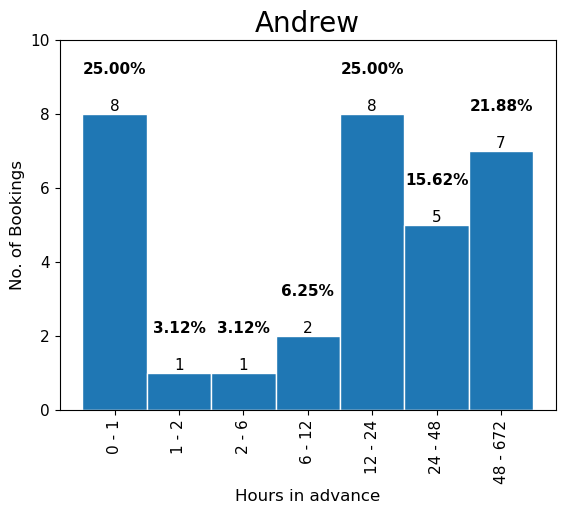

In [28]:
# Booking pattern for User 19 - Andrew

# How far in advance was a booking made in hours?
bookingsUser19['diff'] = (bookingsUser19['start'] - bookingsUser19['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 11})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser19['diff'],bins)

# make modified bookings histogram
modified_bookings_user_19 = bookingsUser19['diff'].where(bookingsUser19['modified_at'] > bookingsUser19['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_19, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)], rotation = 90)

ax.set_xlabel("Hours in advance", fontsize = 12)
ax.set_ylabel("No. of Bookings", fontsize = 12)

# Add the title to the histogram
ax.set_title("Andrew", fontsize = 20)

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser19)
print(total_bookings, 'bookings were made by User 19 - Andrew.')
print(modified_bookings_user_19.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 19 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
    if percentage != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in user 19
for i, bar in enumerate(nested_bars):
    height = bar.get_height() # this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('andrew_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# User 20 - Lu

bookingsUser20 = g1Bookings.loc[g1Bookings['user'] == 20].copy()

bookingsUser20

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
6,2023-08-24 19:00:00+00:00,1800,dishwasher,None,yes,0.380220,22,electricity_consumption,20,2023-08-24 18:19:29+00:00,2023-08-24 18:19:29+00:00,0.675278
14,2023-08-27 06:00:00+00:00,1800,dishwasher,None,yes,0.380220,22,electricity_consumption,20,2023-08-26 23:12:21+00:00,2023-08-26 23:12:21+00:00,6.794167
19,2024-08-11 10:00:00+00:00,3600,oven,None,yes,0.575665,22,electricity_consumption,20,2023-08-29 07:00:36+00:00,2023-08-29 07:00:36+00:00,8354.990000
26,2023-08-31 10:00:00+00:00,3600,oven,None,yes,0.575665,22,electricity_consumption,20,2023-08-30 21:31:32+00:00,2023-08-30 21:31:32+00:00,12.474444
84,2023-09-13 15:00:00+00:00,3600,oven,None,yes,0.575665,22,electricity_consumption,20,2023-09-13 12:27:30+00:00,2023-09-13 12:27:30+00:00,2.541667
85,2023-09-13 18:00:00+00:00,3600,washing_and_drying,None,yes,0.182663,22,electricity_consumption,20,2023-09-13 12:30:02+00:00,2023-09-13 12:30:02+00:00,5.499444


6 bookings were made by User 20 - Lu.
0 of those bookings were modified.


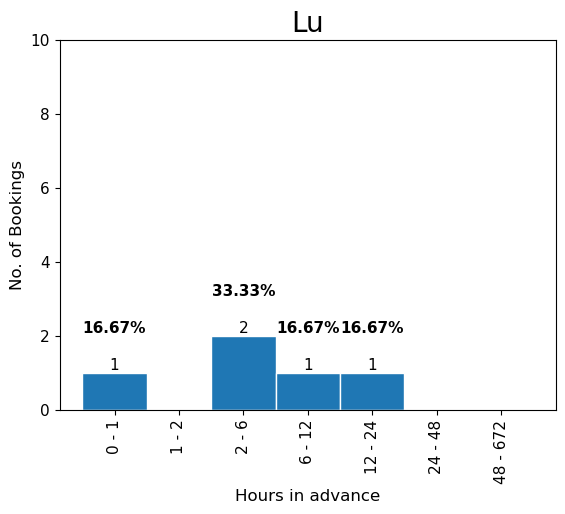

In [31]:
# Booking pattern for User 20 - Lu

# How far in advance was a booking made in hours?
bookingsUser20['diff'] = (bookingsUser20['start'] - bookingsUser20['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 11})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser20['diff'],bins)

# make modified bookings histogram
modified_bookings_user_20 = bookingsUser20['diff'].where(bookingsUser20['modified_at'] > bookingsUser20['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_20, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)], rotation = 90)

ax.set_xlabel("Hours in advance", fontsize = 12)
ax.set_ylabel("No. of Bookings", fontsize = 12)

# Add the title to the histogram
ax.set_title("Lu", fontsize = 20)

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser20)
print(total_bookings, 'bookings were made by User 20 - Lu.')
print(modified_bookings_user_20.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 20 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
    if percentage != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in user 20
for i, bar in enumerate(nested_bars):
    height = bar.get_height() # this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('lu_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()